<a href="https://colab.research.google.com/github/123prith/Prithivi/blob/main/KannadaMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score,precision_score,roc_auc_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression


data= pd.read_csv("/content/sample_data/mnist_test.csv")


train_data = np.load('/content/X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('/content/y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('/content/X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('/content/y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


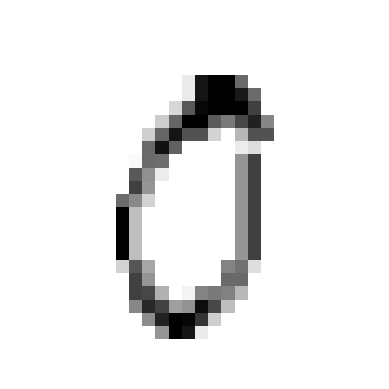

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

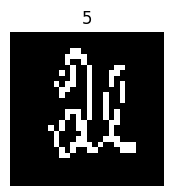

In [ ]:
def plot_random_digit():
    random_index = np.random.randint(0,X_train.shape[0])
    plt.imshow(X_train[random_index], cmap='bone')
    plt.title(y_train[random_index])
    plt.axis("Off")
plt.figure(figsize=[2,2])
plot_random_digit()

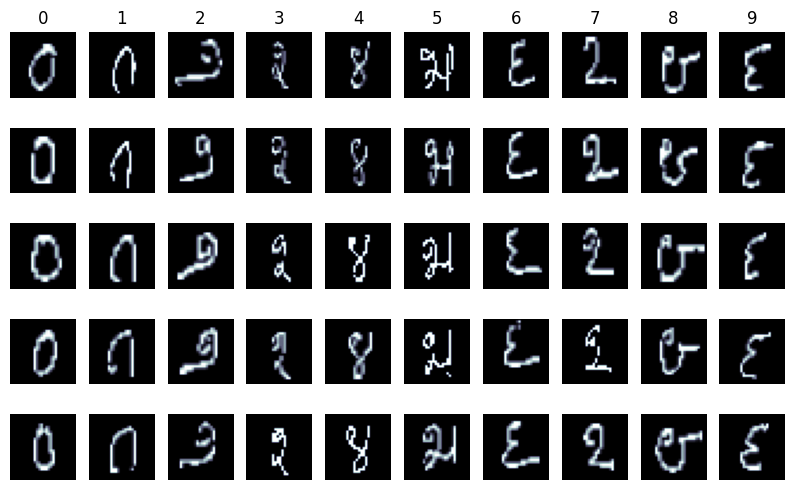

In [ ]:
plt.figure(figsize=[10,6])
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='bone')

In [ ]:
train_size=X_train[90]
train_size

In [ ]:
train_size_img=train_size.reshape(28,28)
train_size_img


In [ ]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [23]:
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [7]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.7971
Decision Tree F1-score: 0.796435558125
Decision Tree Recall: 0.7970999999999999
Decision Tree ROC-AUC: 0.8872777777777777
Decision Tree Confusion Matrix:
[[723 148  13  38  14   1   1   7  39  16]
 [ 88 796   5  34   3  13   8   8  32  13]
 [  4   5 919  13   5  27  11   4   5   7]
 [ 14  16   7 767  34  31  36  56  22  17]
 [  0   4   1  34 854  54   9   7  18  19]
 [  7  11   8  12 122 781  10   9  21  19]
 [  5   6   7  52  19  29 759  95   4  24]
 [ 19  11   5  52  25   9 146 674  19  40]
 [ 55  17   9   2   4   8   5   7 877  16]
 [ 21  43   1  10  26  11   3  10  54 821]]


In [ ]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8749
Random Forest F1-score: 0.8742106194252799
Random Forest Recall: 0.8749
Random Forest ROC-AUC: 0.9894204333333334
Random Forest Confusion Matrix [[781 151   2  29   5   1   2   4  18   7]
 [ 33 904   1  25   7   4   0   3  15   8]
 [  4   2 981   4   0   5   1   2   1   0]
 [ 10   8   1 892  17  18   7  29  16   2]
 [  0   2   0  27 917  34   2   0   9   9]
 [  0   2   2   9 118 850   4   3   8   4]
 [  2   7   1  52  11  25 827  55   3  17]
 [  4   9   2  46  24   1 131 742  10  31]
 [ 17  12   2   2   3   6   1   0 954   3]
 [  7  10   0   3  16   0   6   4  53 901]]


In [ ]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7724
Naive Bayes F1-score: 0.7709946914186255
Naive Bayes Recall: 0.7724
Naive Bayes ROC-AUC: 0.9722614444444444
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  66  20]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 845  31  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  50  30  25  45 728  95   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9087
K-NN F1-score: 0.9081209243255774
K-NN Recall: 0.9087
K-NN ROC-AUC: 0.982220438888889
K-NN Confusion Matrix
[[802 160   4  15   8   0   1   0   7   3]
 [ 15 962   0   6   6   0   0   0   7   4]
 [  4   1 987   3   0   3   1   0   1   0]
 [  9  11   1 915  24  24   2  11   2   1]
 [  0   1   0   5 973  10   1   1   3   6]
 [  0   0   0   8  95 893   2   0   1   1]
 [  2   1   0  26  27   9 895  31   0   9]
 [  9   7   1  35  29   5 120 763   2  29]
 [ 15   6   2   1   2   4   3   0 964   3]
 [  8   8   0   0  19   4   7   2  19 933]]


In [5]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [8]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8104
Decision Tree F1-score: 0.8095982310887943
Decision Tree Recall: 0.8103999999999999
Decision Tree ROC-AUC: 0.8946666666666665
Decision Tree Confusion Matrix:
[[730 147  11  29  11   7   6   6  38  15]
 [ 79 823   5  27   9  15   3   4  24  11]
 [  7   6 930  12   4  20   4   5   4   8]
 [ 14  16  10 785  20  33  30  69  14   9]
 [  0   1   4  43 826  54  11   9  20  32]
 [  9   0   7  16 104 822  10   6  12  14]
 [  5  12   9  50  18  21 803  61   5  16]
 [  6  12   7  56  28  10 130 677  12  62]
 [ 33  25  10   6   5  18   5   5 871  22]
 [ 13  31   6   4  17  12  10   9  61 837]]


In [9]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8918
Random Forest F1-score: 0.8912320382725568
Random Forest Recall: 0.8917999999999999
Random Forest ROC-AUC: 0.9924244000000002
Random Forest Confusion Matrix [[791 155   2  19   5   0   2   4  17   5]
 [ 21 924   1  24   4   2   0   2  13   9]
 [  3   1 984   2   1   6   1   0   1   1]
 [  7  10   1 913  15  16   6  27   5   0]
 [  0   1   0  16 939  23   5   4   7   5]
 [  0   1   0  13 114 861   3   2   4   2]
 [  3   8   1  39  19  26 867  23   2  12]
 [  7   9   0  32  23   3 109 770   6  41]
 [ 18   6   1   0   2   3   3   0 966   1]
 [  4   8   0   0  15   0   6   2  62 903]]


In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9087
K-NN F1-score: 0.9081209243255774
K-NN Recall: 0.9087
K-NN ROC-AUC: 0.982220438888889
K-NN Confusion Matrix
[[802 160   4  15   8   0   1   0   7   3]
 [ 15 962   0   6   6   0   0   0   7   4]
 [  4   1 987   3   0   3   1   0   1   0]
 [  9  11   1 915  24  24   2  11   2   1]
 [  0   1   0   5 973  10   1   1   3   6]
 [  0   0   0   8  95 893   2   0   1   1]
 [  2   1   0  26  27   9 895  31   0   9]
 [  9   7   1  35  29   5 120 763   2  29]
 [ 15   6   2   1   2   4   3   0 964   3]
 [  8   8   0   0  19   4   7   2  19 933]]


In [17]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7838
Naive Bayes F1-score: 0.7822508032008288
Naive Bayes Recall: 0.7838
Naive Bayes ROC-AUC: 0.9748116777777778
Naive Bayes Confusion Matrix:
[[601 236  19  47  11   0   2  14  61   9]
 [ 17 774   8  95  18   6   0   2  62  18]
 [  9   2 977   4   0   5   1   0   1   1]
 [ 17  10   3 788  37  19  34  92   0   0]
 [  0   1   1  18 873  44   1  21  31  10]
 [  0   1   9  34 177 737   5  19  13   5]
 [  6   7  51  21  25  40 786  48   3  13]
 [  7  16   7  50  34   1 192 680   2  11]
 [117  23  20   3   3   6   3   2 815   8]
 [ 25  12   2   0  28   0  13  11 102 807]]


SVC
*******Train************
Accuracy:  0.9808
Precision:  0.980871810815258
Recall:  0.9808
F1 Score:  0.9808015254388021
*******Test************
Accuracy:  0.9151
Precision:  0.917607931162318
Recall:  0.9151
F1 Score:  0.914653387109301

 



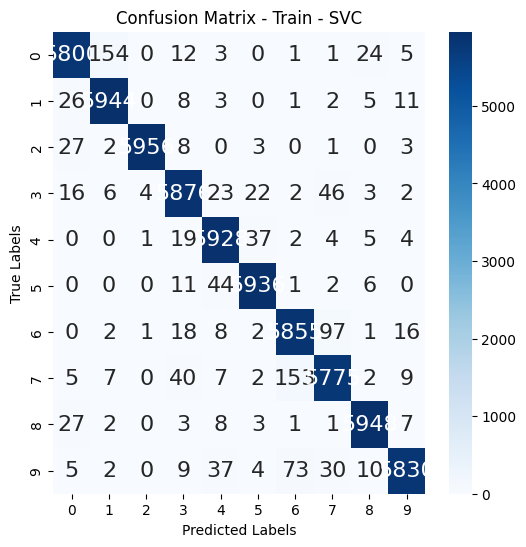

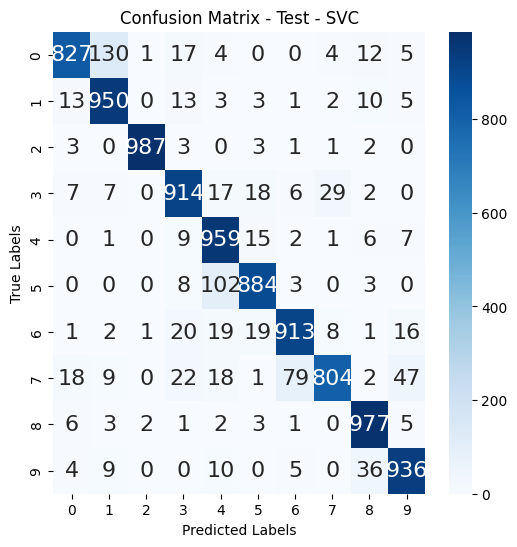

KNeighborsClassifier
*******Train************
Accuracy:  0.9839333333333333
Precision:  0.9840090825099366
Recall:  0.9839333333333333
F1 Score:  0.9839345737056098
*******Test************
Accuracy:  0.9095
Precision:  0.9129270594230348
Recall:  0.9095
F1 Score:  0.9088117528187013

 



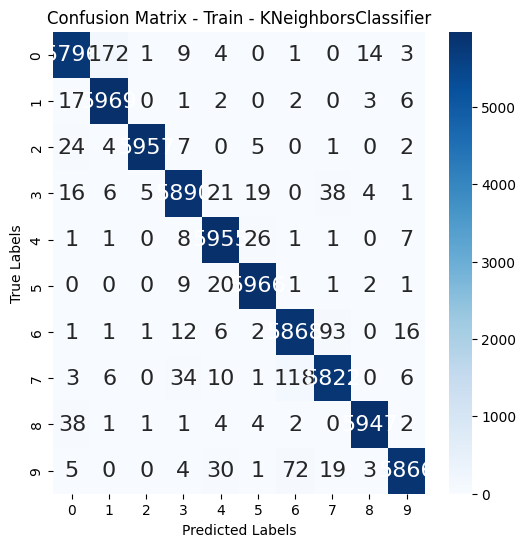

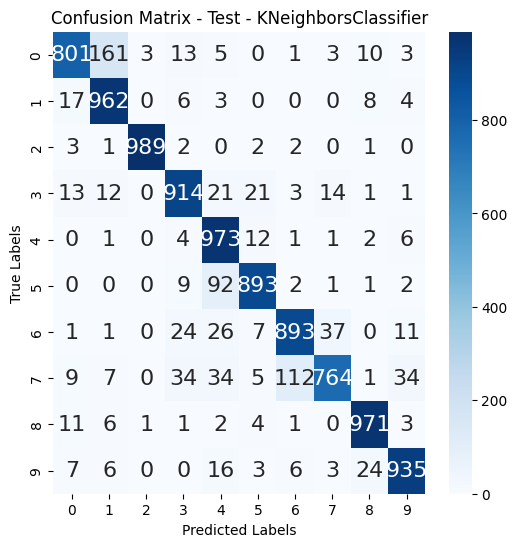

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
*******Train************
Accuracy:  0.9215666666666666
Precision:  0.921544053955432
Recall:  0.9215666666666666
F1 Score:  0.9214527048509932
*******Test************
Accuracy:  0.8323
Precision:  0.8332407580707357
Recall:  0.8323
F1 Score:  0.8310450024966258

 



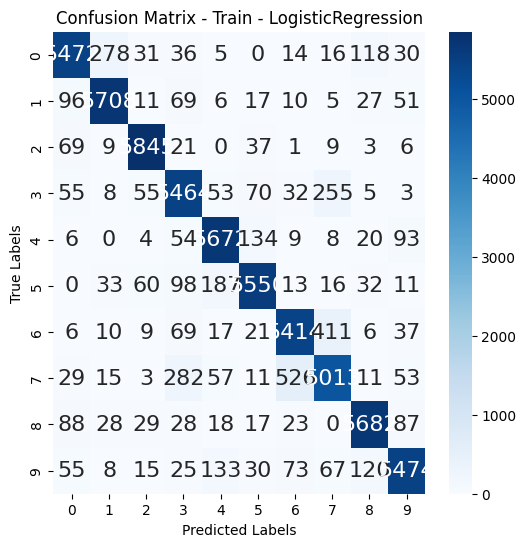

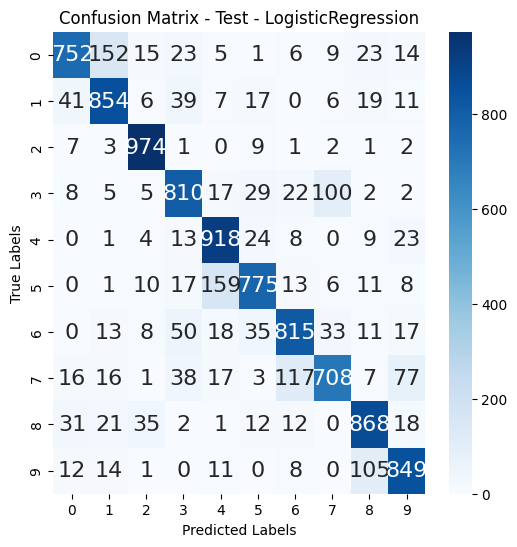

DecisionTreeClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.8107
Precision:  0.8108515090102028
Recall:  0.8107
F1 Score:  0.8099804950594903

 



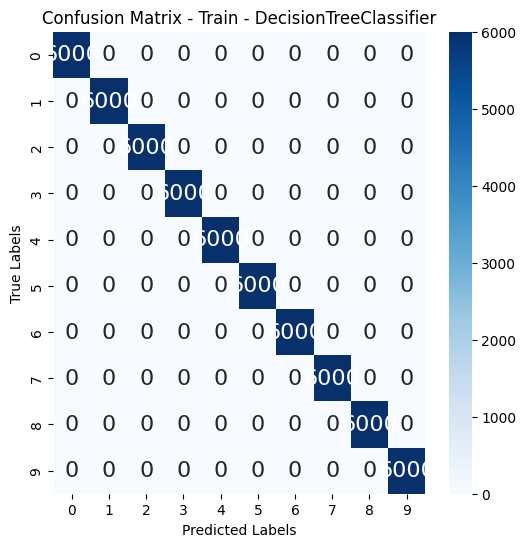

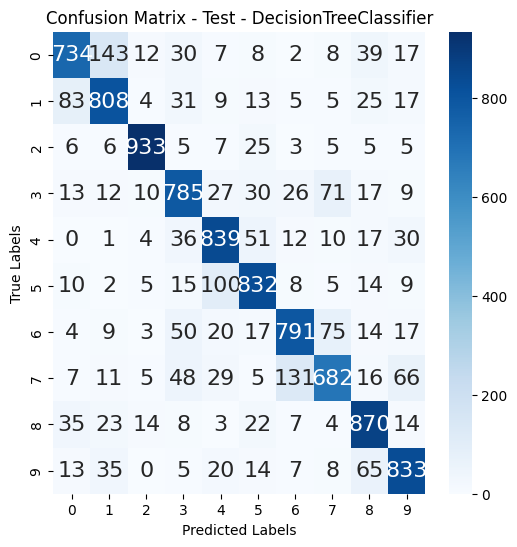

RandomForestClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.8951
Precision:  0.89804024094986
Recall:  0.8951
F1 Score:  0.8945860868651303

 



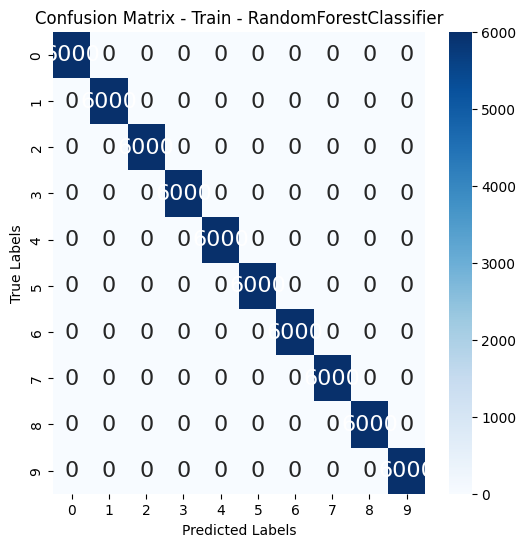

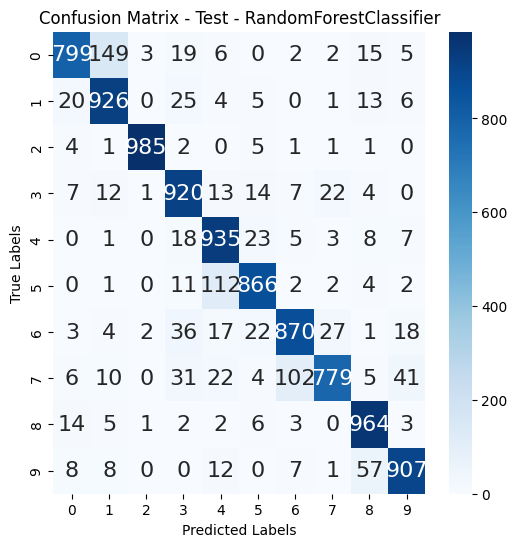

GaussianNB
*******Train************
Accuracy:  0.88485
Precision:  0.8856424209338059
Recall:  0.88485
F1 Score:  0.8848531271480384
*******Test************
Accuracy:  0.7838
Precision:  0.7869926572782564
Recall:  0.7838
F1 Score:  0.7822508032008288

 



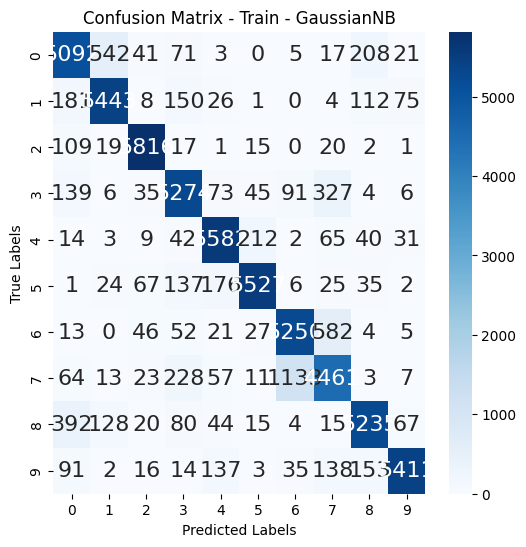

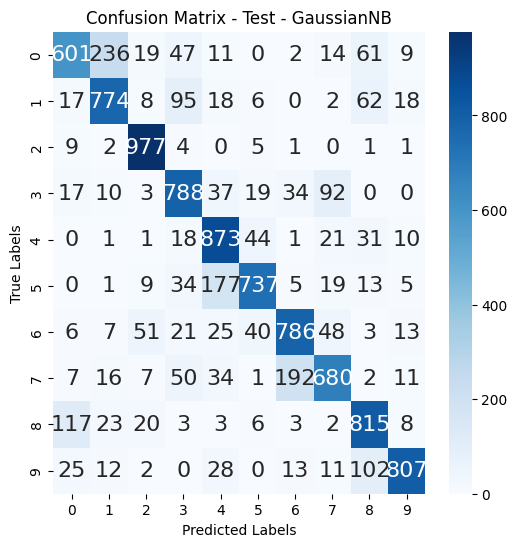

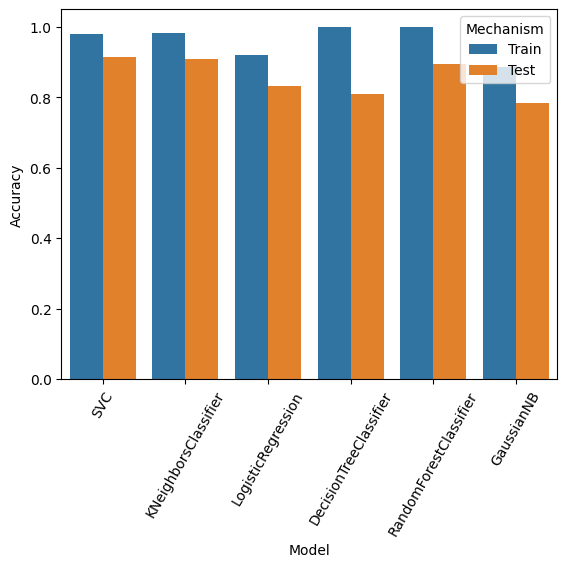

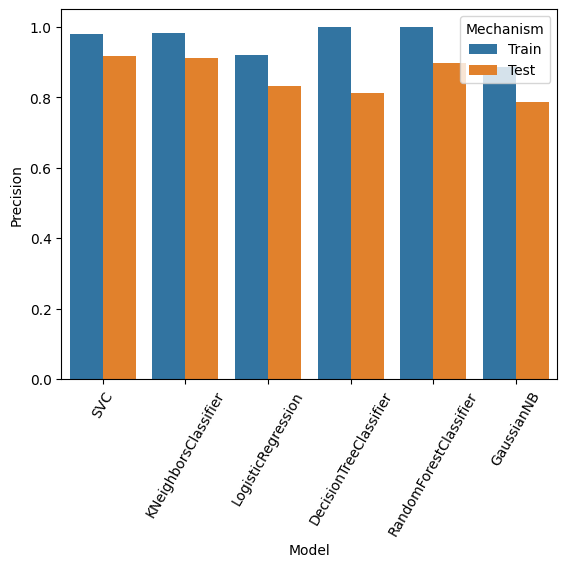

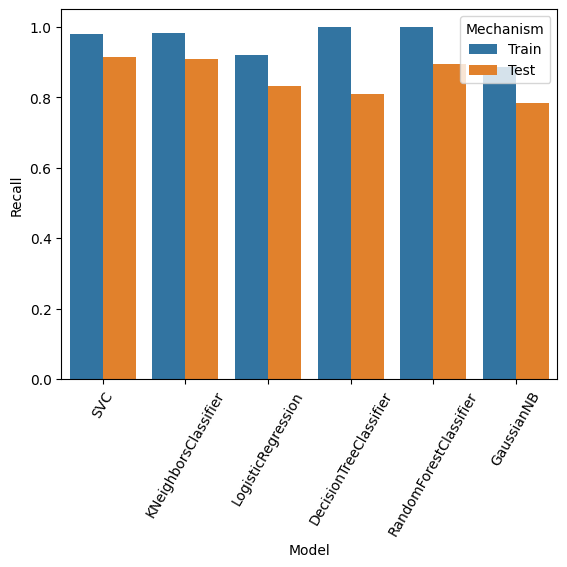

In [26]:
models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
for model in models:
    model.fit(X_train_pca,y_train)
    train_pred = model.predict(X_train_pca)
    test_pred = model.predict(X_test_pca)
    print(type(model).__name__)
    model_names.append(type(model).__name__)

    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred, average='weighted'))
    print("Recall: ",recall_score(y_train,train_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_train,train_pred,average='weighted'))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred,average='weighted'))
    train_recalls.append(recall_score(y_train,train_pred,average='weighted'))


    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred, average='weighted'))
    print("Recall: ",recall_score(y_test,test_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_test,test_pred,average='weighted'))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred,average='weighted'))
    test_recalls.append(recall_score(y_test,test_pred,average='weighted'))
    test_f1s.append(f1_score(y_test,test_pred,average='weighted'))
    print("\n \n")

    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
#train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
#test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()
